In [1]:
import sys
from os import listdir
from os.path import isfile, join
import string

import numpy as np
from plot_solution import plot_solution
import matplotlib.pyplot as plt 

from ioutils import parse_input
from utils import get_distance_matrix
from utils import get_discount_matrix
from utils import get_nodes
from utils import allocate_paths
from utils import get_flow_from_paths
# from utils import get_total_cost
# import cplex_utils
# import graph_utils as graph_utils

In [2]:
DATASET = 'AP'
INPUT_DIRECTORY = "./data/AP/"

In [3]:
files = [join(INPUT_DIRECTORY, f) for f in listdir(INPUT_DIRECTORY) if isfile(join(INPUT_DIRECTORY, f))]
print(files)
file = files[0]
print(file)

['./data/AP/10.3', './data/AP/20.3', './data/AP/50.3', './data/AP/10.2', './data/AP/ReadMe-UMApHMP.txt', './data/AP/5.3', './data/AP/25.3', './data/AP/10.5', './data/AP/100.3', './data/AP/200.3', './data/AP/10.4', './data/AP/40.3', './data/AP/Solutions-UMApHMP.txt']
./data/AP/10.3


In [4]:
n, p, alpha, delta, ksi, nodes_coordinates, demand = parse_input(file, DATASET)
distances = get_distance_matrix(nodes_coordinates)

In [5]:
distances

array([[    0.        , 19961.0558033 , 15695.19654311, 23247.4518241 ,
        23046.6221365 , 30371.32291308, 31577.9646792 , 32743.32891303,
        35819.16331583, 36032.73859423],
       [19961.0558033 ,     0.        , 20191.32685916, 12595.39422727,
        24553.87569785, 18813.21657324, 29874.33691799, 25425.40769452,
        38247.79779951, 30557.93748002],
       [15695.19654311, 20191.32685916,     0.        , 13742.83338584,
         7366.85489253, 18671.4212356 , 15890.65414369, 18296.57531546,
        20875.26188707, 20739.35072549],
       [23247.4518241 , 12595.39422727, 13742.83338584,     0.        ,
        14466.61392728,  7400.71474226, 17776.67905589, 12874.75520832,
        26799.93610028, 17962.84829659],
       [23046.6221365 , 24553.87569785,  7366.85489253, 14466.61392728,
            0.        , 16356.96828587,  8627.19040293, 13047.37025935,
        14115.80625272, 14158.79629089],
       [30371.32291308, 18813.21657324, 18671.4212356 ,  7400.71474226,
   

In [6]:
def get_initial_solution(n, p, distances):
    """Get initial solution method for vns.

    Paramteres: 
    n (int): Number of nodes
    p (int): Number of hubs
    distances (matrix): distance matrix for the graph

    Returns:
    (list): hubs

    Notes:
    This initialization method is taken from the paper
    El-Ghazali Talbi, Raca Todosijevic, 'The robust uncapacitated multiple allocation p-hub median problem' 

    "A solution built in a greedy manner. 
    Namely, the initial p hubs are chosen as those whose maximum transportation cost
    to any other node are the p smallest. More precisely, 
    let g(p) be the maximum transportation cost of a node h to any other node, 
    i.e. g(h) = max{C_ih|i from N, i != h}, h from N.
    Then, the nodes with the p smallest values of function g are taken as the initial p hubs."
    """
    nodes = get_nodes(n)
    longest_edge_from_node = {}
    for node in nodes:
        longest_edge_from_node[node] = max(distances[node])
    hubs = sorted(longest_edge_from_node, key=longest_edge_from_node.get)[:p]
    return hubs

In [7]:
hubs = get_initial_solution(n, p, distances)
hubs

[2, 4, 3]

In [8]:
hubs_bit_map = np.zeros(n)
hubs_bit_map[hubs] = 1
hubs_bit_map

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [9]:
discounts = get_discount_matrix(n, hubs, alpha, delta, ksi)
paths = allocate_paths(n, hubs, distances, discounts)

In [10]:
paths

[[0, 2, 3, 1],
 [0, 2],
 [0, 2, 3],
 [0, 2, 4],
 [0, 2, 3, 5],
 [0, 2, 4, 6],
 [0, 2, 4, 7],
 [0, 2, 4, 8],
 [0, 2, 4, 9],
 [1, 3, 2, 0],
 [1, 3, 2],
 [1, 3],
 [1, 3, 4],
 [1, 3, 5],
 [1, 3, 4, 6],
 [1, 3, 7],
 [1, 3, 4, 8],
 [1, 3, 9],
 [2, 0],
 [2, 3, 1],
 [2, 3],
 [2, 4],
 [2, 3, 5],
 [2, 4, 6],
 [2, 4, 7],
 [2, 4, 8],
 [2, 4, 9],
 [3, 2, 0],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 5],
 [3, 4, 6],
 [3, 7],
 [3, 4, 8],
 [3, 9],
 [4, 2, 0],
 [4, 3, 1],
 [4, 2],
 [4, 3],
 [4, 3, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [5, 3, 2, 0],
 [5, 3, 1],
 [5, 3, 2],
 [5, 3],
 [5, 3, 4],
 [5, 3, 4, 6],
 [5, 3, 7],
 [5, 3, 4, 8],
 [5, 3, 9],
 [6, 4, 2, 0],
 [6, 4, 3, 1],
 [6, 4, 2],
 [6, 4, 3],
 [6, 4],
 [6, 4, 3, 5],
 [6, 4, 7],
 [6, 4, 8],
 [6, 4, 9],
 [7, 4, 2, 0],
 [7, 3, 1],
 [7, 4, 2],
 [7, 3],
 [7, 4],
 [7, 3, 5],
 [7, 4, 6],
 [7, 4, 8],
 [7, 4, 9],
 [8, 4, 2, 0],
 [8, 4, 3, 1],
 [8, 4, 2],
 [8, 4, 3],
 [8, 4],
 [8, 4, 3, 5],
 [8, 4, 6],
 [8, 4, 7],
 [8, 4, 9],
 [9, 4, 2, 0],
 [9, 4, 3, 1],
 [9, 4,

In [11]:
flow = get_flow_from_paths(n, paths, demand)
flow

array([[   0.     ,    0.     ,  333.03306,    0.     ,    0.     ,
           0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,    0.     ,  244.85554,    0.     ,
           0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [ 365.91275,    0.     ,    0.     ,  156.15134,  286.58795,
           0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [   0.     ,  347.5149 ,  110.65728,    0.     ,  194.71717,
         293.77677,    0.     ,  155.33335,    0.     ,   53.33411],
       [   0.     ,    0.     ,  354.99869,  399.4421 ,    0.     ,
           0.     ,  978.83344,  222.14767,  304.28237,  341.13822],
       [   0.     ,    0.     ,    0.     ,  173.0112 ,    0.     ,
           0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,    0.     ,    0.     , 1117.30303,
           0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,    0.    

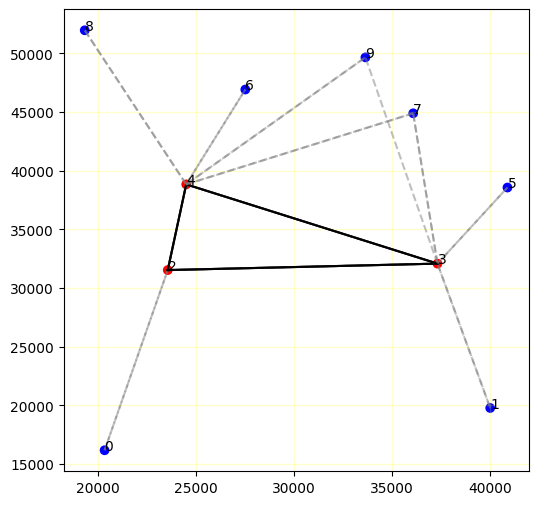

In [12]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, figsize=(6, 6))
alphabet = list(string.ascii_uppercase)
numbers = list(range(n))
plot_solution(ax, nodes_coordinates, numbers, hubs_bit_map, flow, plot_all_lines=False, verbose=0)
plt.show()